# iris 세 가지 품종 분류하기

### **학습 목표**

---

- **cikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.**
- **scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.**
- **모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.**
- **Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.**
- **데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.**

## **2-2. Iris의 세 가지 품종, 분류하기 (1) 붓꽃 분류 문제**

### 붓꽃 종류

---

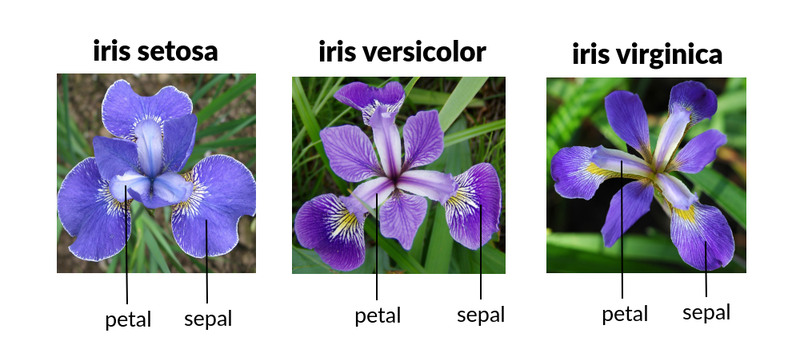
- **petal : 꽃잎**
- **sepal : 꽃받침**

### 사이킷런에서 제공하는 데이터셋

---

- **Toy datasets**
    - **boston, iris, diabetes, digits, linnerrud, wine, breast cancer의 7가지 데이터셋을 제공**
- **Real world datasets**
    - **olivetti faces, 20 newsgroups, labeled faces, forest covertype, RCV1, Kddcup 99, California housing 등 총 7가지 데이터셋을 제공**
    

1) iris Toy datasets

- 총 150개 , 특성 : 4가지, 클래스(목표값) : 3
<br><br>

## **2-3. Iris의 세 가지 품종, 분류 (2) 데이터 준비,  자세히 살펴보기**

### 데이터 가져오기

---

```python
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<실행결과>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
```

### 가져온 데이터 살펴보기

---

**1) iris에 있는 key안의 정보 확인**

```python
# iris에 있는 key의 정보 확인
iris.keys()

'''<실행결과>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])'''
```

**2) iris의 data를 변수에 저장해 정보 확인**

```python
# iris.data를 iris_data에 저장
iris_data = iris.data

print(iris_data.shape) 
#shape는 배열의 형상정보를 출력

''' <실행결과>
(150, 4)  # 150개의 데이터가 각각 4개의 정보를 가지고 있다'''
```

**3) 샘플로 하나의 데이터 정보 보기**

```python
iris_data[0]

''' <실행결과>
# sepal length, sepal width, petal length, petal width
array([5.1, 3.5, 1.4, 0.2]) '''
```

📌 **라벨(label) 또는 타겟(target) : 머신러닝 모델이 출력해야 하는 정답**

**4) 타겟의 정보확인**

```python
iris_label = iris.target
print(iris_label.shape)
iris_label

''' <실행결과>
(150,)   # 배열구조

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) '''
```

**5) 타겟의 이름 확인**

```python
iris.target_names

'''<실행결과>
array(['setosa', 'versicolor', 'virginica'], dtype='<U10') '''
```

**6) `DESCR` : 데이터셋의 설명**

```python
print(iris.DESCR)

'''<실행결과>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ... '''
```

**7) feature_names : 특성의 이름**

```python
iris.feature_names

'''<실행결과>
['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'] '''
```

**8) filename : 데이터셋의 전체 이름**

```python
iris.filename

''' 'iris.csv'  '''
```
<br><br>

## **2-4. 첫 번째 머신러닝 실습 (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비**

### **판다스**

---

- **표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구**
    - **표 데이터를 활용해서 데이터 분석**
    - **대형 데이터의 여러 통계량을 다루는 것에도 최적화**

### 1. iris 데이터셋을 판다스 DataFrame으로 바꾸기

**1) iris의 data를 iris_df에 판다스  DataFrame으로 저장**

```python
import pandas as pd

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df
```

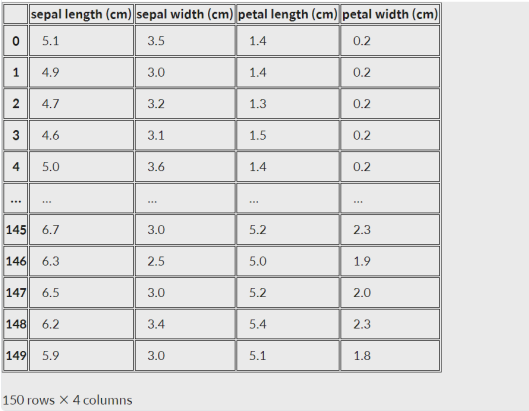

**2) iris_df에 정답 라벨 추가하기**

```python
**iris_df["label"] = iris.target  # pd 사용법 기억하기**
iris_df
```

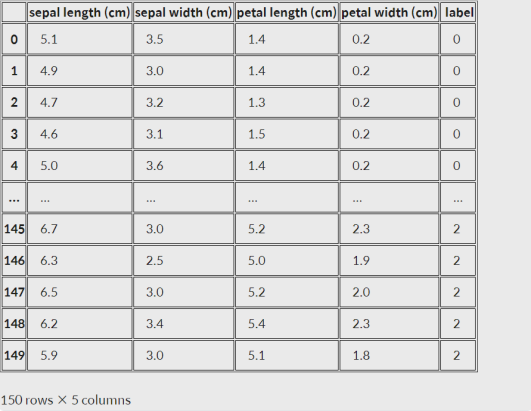

📌 **문제지 : 4가지의 feature 데이터, X로 표현
      정답지 : label 데이터, Target, y로 표현**

### 2. train_test_split을 이용한 훈련세트, 테스트세트 나누기

- 데이터에 iris_data, iris_label이 들어가넹... - > 그럼 DataFrame은 왜 만든건가??

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

''' X_train 개수:  120 , X_test 개수:  30 '''
```

**📌 train_test_split(문제지, 정답지, 나눌 비율, random_state는 랜덤성을 결정)**

### 3. 훈련, 테스트 세트 배열 확인

```python
X_train.shape, y_train.shape

''' ((120, 4), (120,)) '''

X_test.shape, y_test.shape

''' ((30, 4), (30,)) '''

y_train, y_test

''' (array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2])) '''

```

<br><br>
## **2-5. 첫 번째 머신러닝 실습 (2) 첫 번째 머신러닝 모델 학습시키기**

### 지도학습, 비지도 학습

---

- **지도학습 (Supervised Learning) : 정답이 있는 문제 학습**
    - **분류(Classification)**
        - **입력받은 데이터를 특정 카테고리 중 하나로 분류해내는 문제**
    - **회귀(Regression)**
        - **입력받은 데이터에 따라 특정 필드의 수치를 맞히는 문제**
   <br>     
- **비지도 학습 (Unsupervised Learning) : 정답이 없는 문제 학습**

 ✨ **붓꽃 문제**

- **지도 학습(Supervised Learning)**
- **분류(Classification)**

→ 모델을 만들려면 큰 분류에서 작은 분류로

→ 지도학습인가?? 지도학습이라면 분류인가? 예측인가?

→ 비지도 학습인가?? 비지도학습이라면 딥러닝으로 가나??

### **Decision Tree 를 사용해 모델 만들기**

---

 

**1) Decision Tree** 

- **데이터를 분리해나가는 모습이 나무를 뒤집어놓은 것과 같은 모양**
- **데이터를 분리할 경계를 찾아내어 데이터를 체에 거르듯 한 단계씩 분류해나가는 모델**
- **엔트로피, 정보량, 지니불순도 공부해야함 → 이건 다음에...**
- **단점**
    - **결정경계가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 수 있다는 문제**
- **Random Fores**
    - **Decision Tree의 단점을 극복하기 위해 만들어지 모델**
    - **여러 개의 Decision Tree를 합쳐서 만들어놓은 개념**

**2) Decision Tree 모델 만들기**

```python
from sklearn.tree import DecisionTreeClassifier

# **Decision Tree 모델 만들기**
decision_tree = DecisionTreeClassifier(random_state=32)

# 모델의 종류 알아보기
print(decision_tree._estimator_type)

''' classifier '''
```

**3) 모델 훈련하기**

```python
decision_tree.fit(X_train, y_train)

''' DecisionTreeClassifier(random_state=32) '''
```

✨ **training dataset 으로 모델을 학습시킨다는 것**

 **training dataset에 맞게 모델을 fitting, 즉 맞추는 것.**

**training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문**

**training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐**

<br><br>

## **2-6. 첫 번째 머신러닝 실습 (3) 첫 번째 머신러닝 모델 평가하기**

### 학습한 모델을 가지고 **test 데이터로 예측하기**

---

   

```python
y_pred = decision_tree.predict(X_test)
y_pred
'''
array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2]) '''
```

✍️ **y_pred → 학습한 모델로 test데이터를 예측한 예측할 값**

### **정확도(Accuracy) : 예측값, 실제값을 비교한 수치**

```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

'''
0.9
'''
```

🙀 accuracy_score(실제값, 예측값)

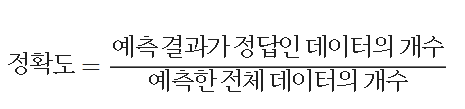

맞은 개수 = 30 * 0.9 = 27

틀린 개수 = 30 - 27 = 3

<br><br>

## **2-7. 첫 번째 머신러닝 실습**
**(4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!**

### **Decision Tree 모델을 학습시키고 예측하는 전체 과정 코드**

```python
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
```

```
 <실행결과>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

```

📌 모델을 바꿔보고 싶다면?
      **전체코드에서 (4)모델 학습 및 예측에서 모델만 바꿔주면 가능**
<br>
### **Random Forest**

---

- **Decision Tree를 여러 개 모아놓은 모델**
- **앙상블(Ensemble) 기법**
    - 여러 개의 분류기를 생성해 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
    - 강력한 하나의 모델을 사용하는대신 보다 약한 모델 여러개를 조합하여 더 정확한 예측에 도움을 주는 방식
    
    <br>
    
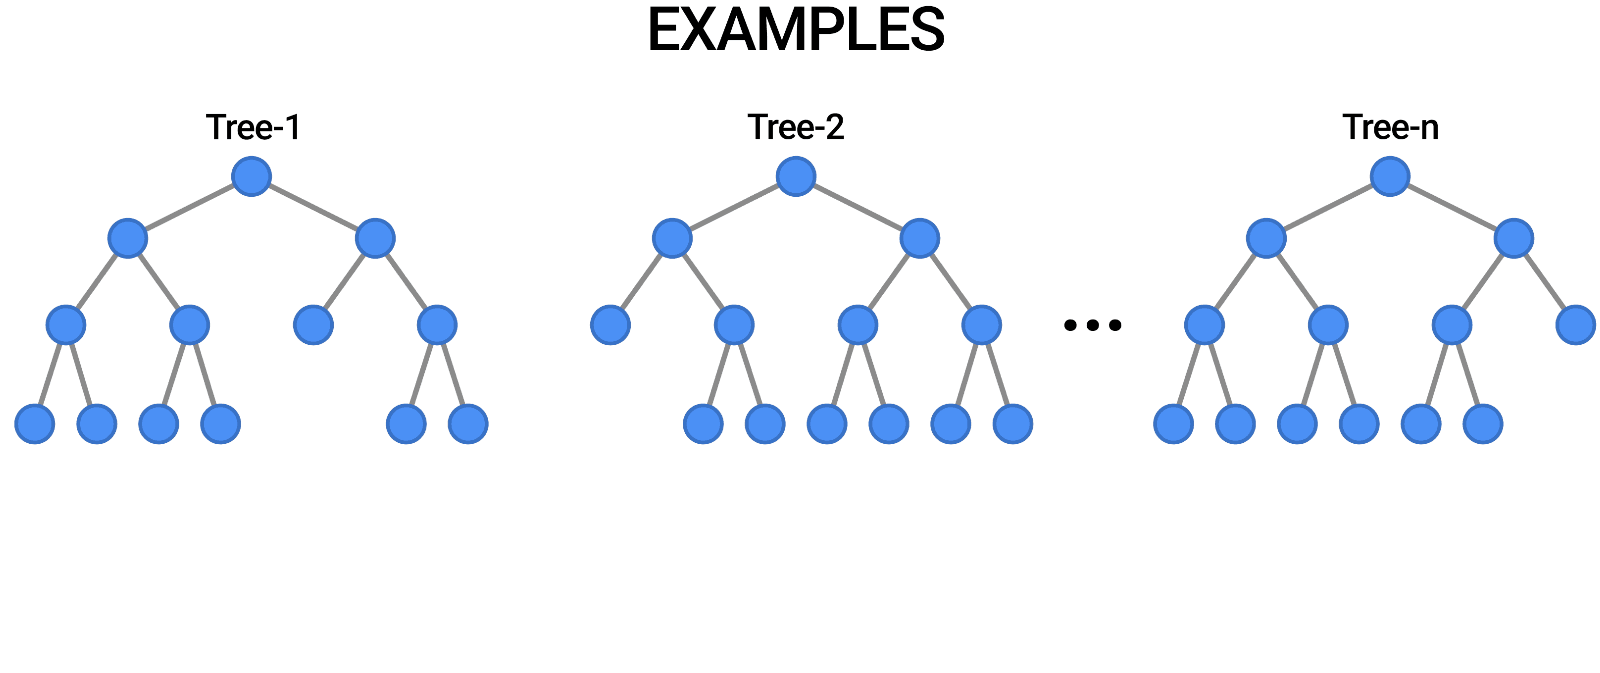


### **Support Vector Machine (SVM)**

---

- **Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘**

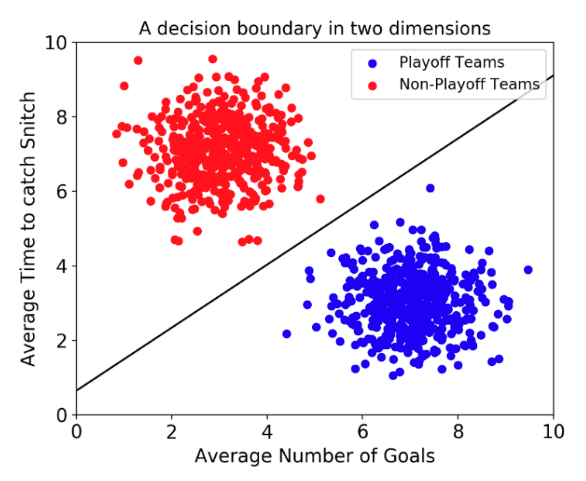

- **2 차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때**
    - **Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선**
    - **Support Vector: Decision Boundary에 가까이 있는 데이터**
    - **Margin: Decision Boundary와 Support Vector 사이의 거리**
    
    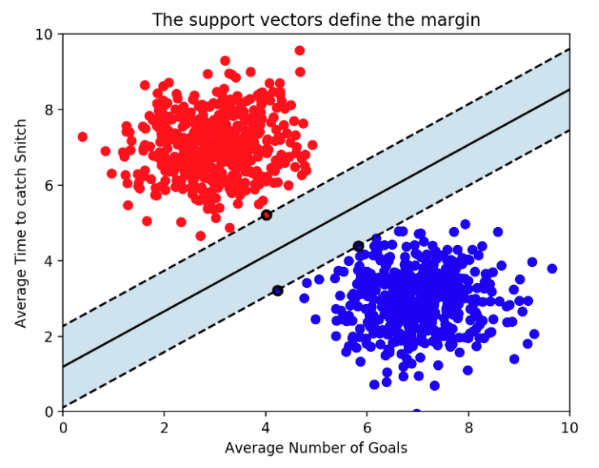
    

### 🎁 [SVM 추천 블로그](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM)

<br><br>
### **Stochastic Gradient Descent Classifier (SGDClassifier) - 확률적 경사하강법**

---

- **SGD (Stochastic Gradient Descent) : 배치 크기가 1인 경사하강법 알고리즘**
- **확률적 경사하강법 : 데이터 세트에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산**

**<최소값을 찾는 과정>**

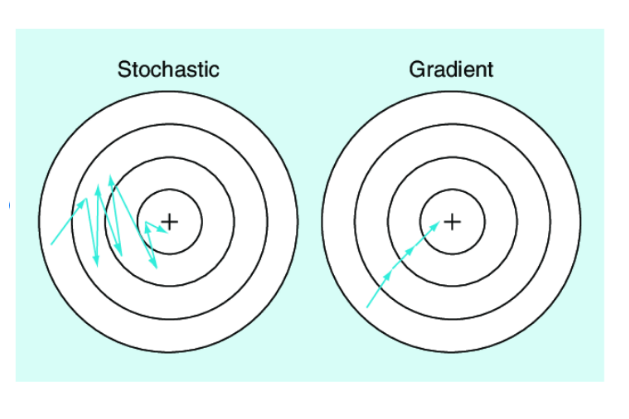

**[출처: https://www.researchgate.net/figure/Stochastic-gradient-descent-compared-with-gradient-descent_fig3_328106221]**

- **배치 - 경사하강법의 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수**
    - **Gradient Descent :  전체 데이터 셋**
 <br>   
- **단점**
    - **반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심합니다.**
    - **확률적 경사하강법의 여러 변형 함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않습니다. (최저점을 찾지 못할 수 있음)**
   
   <br>
- **단점 극복하기 - 미니 배치**
    - **확률적 경사하강법(미니 배치 SGD)는 전체 배치 반복과 SGD 의 절충안**
    - **일반적으로 무작위로 선택한 10개에서 1,000개 사이의 예로 구성**
    - **SGD의 노이즈를 줄이면서도 전체 배치보다는 더 효율적**
    
<br><br>
### **Logistic Regression**

---

- **가장 널리 알려진 선형 분류 알고리즘.**
- **소프트맥스(softmas) 함수를 사용한 다중 클래스 분류 알고리즘**
- **다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고 부름**
- **이름은 회귀지만, 실제로는 분류를 수행**

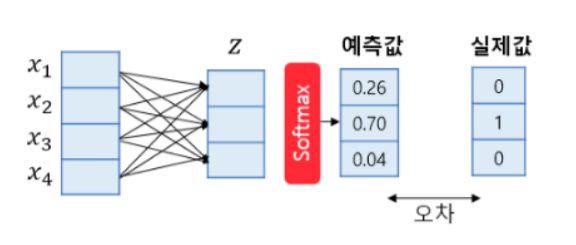
<br>
- **소프트맥스 함수 
: 차원의 개수만큼 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수.**

- **오차와 실제 값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.**

# (1) load_digits : 손글씨를 분류
<br>

## 1 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

## 2  데이터 준비 - load_digits 메서드를 사용

In [2]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


## 3 데이터 이해하기

In [3]:
# 데이터와 타겟의 이름을 재정의하고 배열 구조 확인
digits_data = digits.data
digits_label = digits.target

print("digits_data의 배열구조: ", digits_data.shape)
print("digits_label의 배열구조:", digits_label.shape)

digits_data의 배열구조:  (1797, 64)
digits_label의 배열구조: (1797,)


In [4]:
# 특성 이름 확인하기
print("타겟 이름 확인:", digits.feature_names)

타겟 이름 확인: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
# 타겟 이름 확인하기
print("타겟 이름 확인:", digits.target_names)

타겟 이름 확인: [0 1 2 3 4 5 6 7 8 9]


In [6]:
# 데이터 Describe 해 보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 4 train, test 데이터 분리

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label,test_size=0.2, random_state=7)

print('X_train 개수 :', len(X_train),', X_test 개수 :', len(X_test))

X_train 개수 : 1437 , X_test 개수 : 360


In [14]:
print("X_train 배열구조 :", X_train.shape, "   y_train 배열구조 :", y_train.shape)
print("X_test 배열구조 :", X_test.shape, "   y_test 배열구조 :", y_test.shape)

X_train 배열구조 : (1437, 64)    y_train 배열구조 : (1437,)
X_test 배열구조 : (360, 64)    y_test 배열구조 : (360,)


## 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### Decision Tree 모델로 학습, 평가하기

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree 모델 만들기
decision_tree = DecisionTreeClassifier(random_state=32)

# Decision Tree 모델로 훈련
decision_tree.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = decision_tree.predict(X_test)

# 모델 정확도 알아보기1
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Decision Tree 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Decision Tree 모델의 정확도 : 0.8555555555555555 

Decision Tree 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### Random Forest 모델로 학습, 평가하기

In [9]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성
random_forest = RandomForestClassifier(random_state=32)

# RandomForestClassifier 모델 훈련
random_forest.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = random_forest.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("RandomForest 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

RandomForest 모델의 정확도 : 0.9638888888888889 

RandomForest 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### SVM 모델로 학습, 평가하기

In [10]:
from sklearn import svm

# SVM 모델 생성
svm_model = svm.SVC()

# SVM 모델 훈련
svm_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = svm_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SVM 모델의 정확도 :", accuracy, "\n")

## 모델 분류 성능표
print("SVM 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SVM 모델의 정확도 : 0.9888888888888889 

SVM 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD Classifier 모델로 학습, 평가하기

In [11]:
from sklearn.linear_model import SGDClassifier

# SGD 모델 생성
sgd_model = SGDClassifier()

# SGD 모델 훈련
sgd_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = sgd_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SGD 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("SGD 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SGD 모델의 정확도 : 0.95 

SGD 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.84      0.90      0.87        42
           2       0.98      1.00      0.99        40
           3       0.92      0.97      0.94        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.97      0.86      0.91        43
           9       0.94      0.91      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression 모델로 학습, 평가하기

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 0.9527777777777777 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 훈련 후 평가를 했더니 빨간 경고문이 뜬다.
 경고문이 싫어서 번역을 해 보았더니 max_iter를 늘이거나 데이터 크기를 조정하라고 하네요..<br>
 주어진 데이터이니 데이터 크기를 조정할 수 없어 <br>
 'max_iter' 하이퍼파라미터를 조정했습니다. 

### Logistic Regression 모델로 학습, 평가하기2 - max_iter 변화주기

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=2100)

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 0.95 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



##  6 모델평가하기

### 숫자 분류에서는 
모델 분류 성능표가 어디 값이 좋은 지 판단할 수 없어서 **정확도로 기준**을 정했습니다.<br>
**SVM의 정확도**가 **0.99**라서 **SVM모델이 좋다**고 판단했습니다.



# (2) load_wine : 와인 분류

## 1 필요한 모듈 import하기

In [81]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2  데이터 준비 - load_wine 메서드를 사용

In [82]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


## 3 데이터 이해하기

In [83]:
# 데이터와 타겟의 이름을 재정의하고 배열 구조 확인
wine_data = wine.data
wine_label = wine.target

print("wine_data의 배열구조: ", wine_data.shape)
print("wine_label의 배열구조:", wine_label.shape)

wine_data의 배열구조:  (178, 13)
wine_label의 배열구조: (178,)


In [84]:
# 특성 이름 확인하기
print("타겟 이름 확인:", wine.feature_names)

타겟 이름 확인: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [85]:
# 타겟 이름 확인하기
print("타겟 이름 확인:", wine.target_names)

타겟 이름 확인: ['class_0' 'class_1' 'class_2']


In [86]:
# 데이터 Describe 해 보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 4 train, test 데이터 분리 - train_test_split()이용

In [96]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label,test_size=0.2, random_state=42)

print('X_train 개수 :', len(X_train),', X_test 개수 :', len(X_test))

X_train 개수 : 142 , X_test 개수 : 36


In [92]:
print("X_train 배열구조 :", X_train.shape, "   y_train 배열구조 :", y_train.shape)
print("X_test 배열구조 :", X_test.shape, "   y_test 배열구조 :", y_test.shape)

X_train 배열구조 : (142, 13)    y_train 배열구조 : (142,)
X_test 배열구조 : (36, 13)    y_test 배열구조 : (36,)


## 5 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### Decision Tree 모델로 학습, 평가하기

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree 모델 만들기
decision_tree = DecisionTreeClassifier(random_state=32)

# Decision Tree 모델로 훈련
decision_tree.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = decision_tree.predict(X_test)

# 모델 정확도 알아보기1
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Decision Tree 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Decision Tree 모델의 정확도 : 0.9444444444444444 

Decision Tree 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### Random Forest 모델로 학습, 평가하기

In [110]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성
random_forest = RandomForestClassifier(random_state=32)

# RandomForestClassifier 모델 훈련
random_forest.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = random_forest.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("RandomForest 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

RandomForest 모델의 정확도 : 1.0 

RandomForest 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM 모델로 학습, 평가하기

In [113]:
from sklearn import svm

# SVM 모델 생성
svm_model = svm.SVC()

# SVM 모델 훈련
svm_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = svm_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SVM 모델의 정확도 :", accuracy, "\n")

## 모델 분류 성능표
print("SVM 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SVM 모델의 정확도 : 0.8055555555555556 

SVM 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



### SGD Classifier 모델로 학습, 평가하기

In [106]:
from sklearn.linear_model import SGDClassifier

# SGD 모델 생성
sgd_model = SGDClassifier()

# SGD 모델 훈련
sgd_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = sgd_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SGD 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("SGD 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SGD 모델의 정확도 : 0.6944444444444444 

SGD 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.56      1.00      0.72        14
           2       0.00      0.00      0.00         8

    accuracy                           0.69        36
   macro avg       0.52      0.60      0.53        36
weighted avg       0.61      0.69      0.62        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 빨간 경고문이 뜨넹요...
경고문이 나온다는 것은 무엇이 좋지 않다는 이야기인데..<br>
그래서 번역기를 돌렸더니 오차행렬에서 0이 있어서 계산은 하지만<br>
경고문을 보내니 'zero_division'의 파라미터를 조정하라고 하네요..<br>
'zero_division'의 기본값은 'warn', 0을 받아는 주지만 경고문은 발송하는 거라고...<br>
그래서 어디서 0이 나오는 지 확인하려고 아래에서 정답지와 예측값을 출력해보니<br>
예측값에 2가 없네요...<br>
데이터 개수가 적어서 그런거겠죠??<br>
그리고 'zero_division' 파라미터는 어디서 조정해야 하는 지...<br>
모델 생성할 때 지정하니 타입에러가 나더군요..<br>
어디서 'zero_division'를 조정해야 할까요??<br>
알 수 없어서 주저리 했어요...

In [99]:
print(y_test)
print(y_pred)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0]


In [107]:
# SGD 모델 생성
sgd_model = SGDClassifier()

# SGD 모델 훈련
sgd_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = sgd_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SGD 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("SGD 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SGD 모델의 정확도 : 0.6111111111111112 

SGD 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        14
           1       0.86      0.43      0.57        14
           2       0.67      0.25      0.36         8

    accuracy                           0.61        36
   macro avg       0.69      0.56      0.55        36
weighted avg       0.69      0.61      0.58        36



#### 근데 위에서는 되네요... 
이건 데이터 부족일까요?? 모델 불안정일까요??

### Logistic Regression 모델로 학습, 평가하기

In [68]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 0.9722222222222222 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 훈련 후 평가를 했더니 빨간 경고문이 뜬다.
 경고문이 싫어서 번역을 해 보았더니 max_iter를 늘이거나 데이터 크기를 조정하라고 하네요..<br>
 주어진 데이터이니 데이터 크기를 조정할 수 없어 <br>
 'max_iter' 하이퍼파라미터를 조정했습니다. 

In [116]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 2900)

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 1.0 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##  6 모델평가하기

### 와인 분류에서는 
정확도와 모델 분류 성능표가 RandonForest, Logistic Regression 둘 다 1이 나와서 고민을 했습니다.<br>
RandonForest는 하이퍼파라미터를 조정하지 않아도 1이 나오고, <br>
Logistic Regression은 하이퍼파라미터 'max_iter'를 조정하고 나서 1이 나왔으므로<br>
RandonForest모델이 더 적합하다고 생각됩니다.

# (3) load_breast_cancer : 유방암여부 진단

## 1 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2  데이터 준비 - load_breast 메서드를 사용

In [2]:
breast = load_breast_cancer()

print(dir(breast))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


## 3 데이터 이해하기

In [3]:
# 데이터와 타겟의 이름을 재정의하고 배열 구조 확인
breast_data = breast.data
breast_label = breast.target

print("breast_data의 배열구조: ", breast_data.shape)
print("breast_label의 배열구조:", breast_label.shape)

breast_data의 배열구조:  (569, 30)
breast_label의 배열구조: (569,)


In [4]:
# 특성 이름 확인하기
print("타겟 이름 확인:", breast.feature_names)

타겟 이름 확인: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# 타겟 이름 확인하기
print("타겟 이름 확인:", breast.target_names)

타겟 이름 확인: ['malignant' 'benign']


In [7]:
# 데이터 Describe 해 보기
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 4 train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(breast_data, breast_label, test_size=0.2, random_state=42)

print('X_train 개수 :', len(X_train),', X_test 개수 :', len(X_test))

X_train 개수 : 455 , X_test 개수 : 114


In [9]:
print("X_train 배열구조 :", X_train.shape, "   y_train 배열구조 :", y_train.shape)
print("X_test 배열구조 :", X_test.shape, "   y_test 배열구조 :", y_test.shape)

X_train 배열구조 : (455, 30)    y_train 배열구조 : (455,)
X_test 배열구조 : (114, 30)    y_test 배열구조 : (114,)


## 5 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### Decision Tree 모델로 학습, 평가하기

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree 모델 만들기
decision_tree = DecisionTreeClassifier(random_state=32)

# Decision Tree 모델로 훈련
decision_tree.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = decision_tree.predict(X_test)

# 모델 정확도 알아보기1
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Decision Tree 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Decision Tree 모델의 정확도 : 0.9473684210526315 

Decision Tree 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Random Forest 모델로 학습, 평가하기

In [11]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성
random_forest = RandomForestClassifier(random_state=32)

# RandomForestClassifier 모델 훈련
random_forest.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = random_forest.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("RandomForest 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

RandomForest 모델의 정확도 : 0.9649122807017544 

RandomForest 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### SVM 모델로 학습, 평가하기

In [12]:
from sklearn import svm

# SVM 모델 생성
svm_model = svm.SVC()

# SVM 모델 훈련
svm_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = svm_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SVM 모델의 정확도 :", accuracy, "\n")

## 모델 분류 성능표
print("SVM 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SVM 모델의 정확도 : 0.9473684210526315 

SVM 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### SGD Classifier 모델로 학습, 평가하기

In [13]:
from sklearn.linear_model import SGDClassifier

# SGD 모델 생성
sgd_model = SGDClassifier()

# SGD 모델 훈련
sgd_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = sgd_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("SGD 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("SGD 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

SGD 모델의 정확도 : 0.9298245614035088 

SGD 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        43
           1       1.00      0.89      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



### Logistic Regression 모델로 학습, 평가하기

In [14]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 0.956140350877193 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 훈련 후 평가를 했더니 빨간 경고문이 뜬다.
 경고문이 싫어서 번역을 해 보았더니 max_iter를 늘이거나 데이터 크기를 조정하라고 하네요..<br>
 주어진 데이터이니 데이터 크기를 조정할 수 없어 <br>
 max_iter' 하이퍼파라미터를 조정했습니다. 

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 2500)

# Logistic Regression 모델 훈련
logistic_model.fit(X_train, y_train)

# 테스트 데이터의 예상값 저장
y_pred = logistic_model.predict(X_test)

# 모델 정확도 알아보기
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression 모델의 정확도 :", accuracy, "\n")

# 모델 분류 성능표
print("Logistic Regression 모델의 분류 성능표 \n", classification_report(y_test, y_pred))

Logistic Regression 모델의 정확도 : 0.956140350877193 

Logistic Regression 모델의 분류 성능표 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##  6 모델평가하기

### 유방암 판단에는 
오차행렬에서 **recall지수**가 **낮은 것**이 좋은 모델이라고 판단해서<br>
정확도보다는 recall지수가 낮은 **SVM모델**이 가장 좋은 모델이라고 생각합니다.

## 회고
- 이번 프로젝트에서 **어려웠던 점,**
   - 훈련 모델을 쓰는 데, 어디에서 import해야 하는 지 몰라서..어려웠습니다.
   - 정리된 데이터셋이어서 나름 편하게 한 것 같아요<br><br>
   
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
   - **알아낸 점**
      - 모델을 평가할 때 '**정확도**만 **중요한** 것이 아니라 오차행렬처럼 **다른 것**도 살펴야 한다'는 것
      - classification_report에서 precision, recall, f1-score는 어떤 의미인지 알게 되었습니다.
      - 경고문이 뜨면 번역해서 찾아내기 시도하고 성공도 하고 실패도 하고 했습니다.<br><br>
   - **아직 모호한 점**
      - classification_report에서 0이 생성되어 경고문이 뜨는 데, 'zero_division' 파라미터를 어디서 조정하는 지 모르겠어요<br><br>
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
   - 예제가 좋아서 별 어려움이 없었던 듯 해요..
   - 단지 모델들의 개념을 정리하다가 아직 다 못해서.. 아쉽네요<br><br>
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.<br><br>
- **자기 다짐**
   - 언제나 열심히 해서 **결과물**을 가져보는 것